Stored 'snow_amounts' (list)
Stored 'start_time' (int)
Stored 'snow_times' (ndarray)


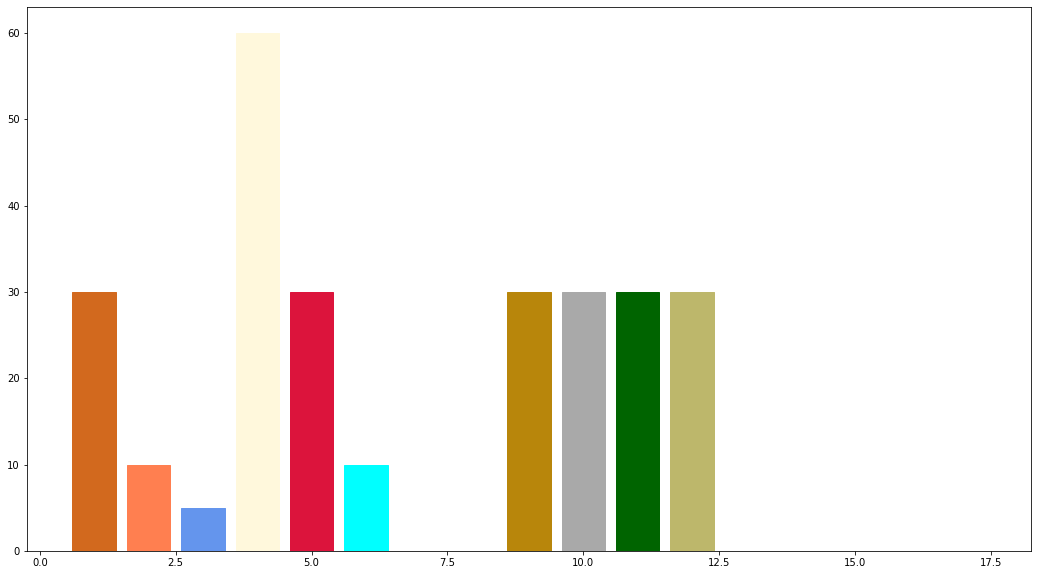

In [112]:
# в этой секции иницилизируется сколько снега выпадает каждый час и строится его график

import matplotlib.pyplot as plt
import numpy as np

# Проинициализировать глобальные переменные
default_snow_amounts = [30, 10, 5, 60, 30, 10, 0, 0, 30, 30, 30, 30, 0, 0, 0, 0, 0]
snow_amounts = default_snow_amounts
%store snow_amounts

start_time = 1
%store start_time
snow_times = np.arange(start_time, len(snow_amounts) + 1)
%store snow_times

# Делаем график с количеством снега, выпадающего каждый час
plt.figure(figsize=(18, 10))
barlist = plt.bar(snow_times, snow_amounts)

colors = ['chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen']

for i in range(len(barlist)):
    barlist[i].set_color(colors[i])

barlist.set()
plt.show()

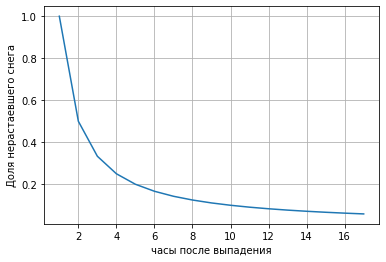

In [106]:
# здесь можно задать f(x) - как будет убывать количество снега в зависимости от времени у одной кучки

import matplotlib.pyplot as plt
import numpy as np

%store -r

arguments = np.array(snow_times)
melt_func = 1/(arguments) # функция таяния

fig, ax = plt.subplots()
ax.plot(arguments, melt_func)

ax.set(xlabel='часы после выпадения', ylabel='Доля нерастаевшего снега')
ax.grid()

fig.savefig("test.png")
plt.show()

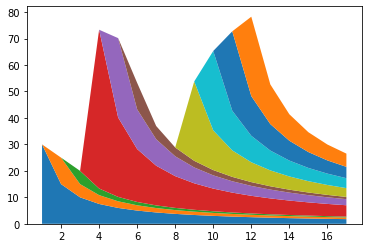

In [107]:
%store -r

# как раз формула свертки тупо
def get_snow_amount(pile_number: int, hour: int):  # n-ый час в смысле начинаем с 0го часа
    if hour < pile_number: # если куча ещё не появилась
        return 0

    # stackplot уже "делает" свертку за нас - он покрывает один график сверху другим, поэтому то, что ниже не нужно 
    # for rec_pile_number in range(pile_number+1):
    #     snow_amount += snow_amounts[rec_pile_number] * melt_func[hour - rec_pile_number]

    return snow_amounts[pile_number] * melt_func[hour - pile_number]


def get_points_for_nth_snow_pile_plot(n: int):
    if snow_amounts[n] == 0: 
        return [0] * len(snow_times)

    points = []
    for t in range(len(snow_times)):
        points.append(get_snow_amount(n, t))  # melt_func[t] * snow_amount)

    return points

# генерим график для каждой кучи отдельно и последовательно, задавая точки в каждый час с количеством снега в данный час
pile_plots_points = []
for i in range(len(snow_amounts)):
    pile_plots_points.append(get_points_for_nth_snow_pile_plot(i))

x = snow_times
y = np.vstack(pile_plots_points)

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()